# importing important libraries

In [ ]:
from sklearn.datasets import fetch_openml
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, mean_absolute_error
import seaborn as sns

# Loading MNIST dataset

In [ ]:
mnist = fetch_openml('mnist_784')

In [ ]:
x, y = mnist['data'], mnist['target']

In [ ]:
x = np.array(x)
y = np.array(y)

In [ ]:
x.shape


(70000, 784)

In [ ]:
y = y.astype('int')

In [ ]:
x_train, x_test = x[:60000], x[60000:70000]
y_train, y_test = y[:60000], y[60000:70000]

In [ ]:
x_train.shape

(60000, 784)

In [ ]:
x_test.shape

(10000, 784)

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_test.shape

(10000,)

# Data visualisation 

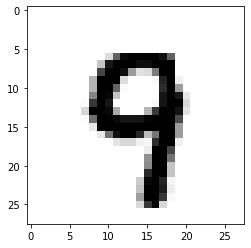

In [ ]:
some_image = x[520]
some_image = some_image.reshape(28,28)
plt.imshow(some_image, cmap=matplotlib.cm.binary,interpolation='nearest')

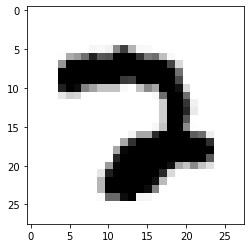

In [ ]:
some_image = x[120]
some_image = some_image.reshape(28,28)
plt.imshow(some_image, cmap=matplotlib.cm.binary,interpolation='nearest')

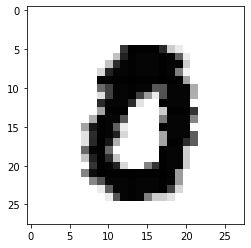

In [ ]:
some_image = x[69]
some_image = some_image.reshape(28,28)
plt.imshow(some_image, cmap=matplotlib.cm.binary,interpolation='nearest')

# Applying DecisionTreeRegressor as base model

# Assumption depth size 1

In [ ]:
lr = 0.1   #learning rate

In [ ]:
dt = DecisionTreeRegressor(max_depth = 1)
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=1)

In [ ]:
y_pred = dt.predict(x_test)

In [ ]:
y_pred[:10]

array([5.36713732, 2.6254691 , 2.6254691 , 2.6254691 , 5.36713732,
       2.6254691 , 5.36713732, 5.36713732, 2.6254691 , 5.36713732])

In [ ]:
mae = mean_absolute_error(y_test,  y_pred)
mae

2.2267110373114707

In [ ]:
score = r2_score(y_test, y_pred)
score

0.22100481734722877

In [ ]:
y_pred = np.round(y_pred)

In [ ]:
print(accuracy_score( y_test, y_pred))    # accuracy

0.0716


# Iteration 1

In [ ]:
y_it1 = dt.predict(x_train)
y_it1 = np.round(y_it1)

In [ ]:
y_train1 = y_train - y_it1

In [ ]:
dt1 = DecisionTreeRegressor(max_depth = 1)
dt1.fit(x_train,  y_train1)

DecisionTreeRegressor(max_depth=1)

In [ ]:
y_pred1 = dt1.predict(x_test)
y_pred1 = np.round(y_pred1)
print(accuracy_score( y_test, y_pred + y_pred1 ))    # accuracy

0.1238


# Iteration 2

In [ ]:
y_it2 = dt1.predict(x_train)
y_it2 = np.round(y_it2)

In [ ]:
y_train2 = y_train1 - y_it2

In [ ]:
dt2 = DecisionTreeRegressor(max_depth = 1)
dt2.fit(x_train,  y_train2)

DecisionTreeRegressor(max_depth=1)

In [ ]:
y_pred2 = dt2.predict(x_test)
y_pred2 = np.round(y_pred2) 
print(accuracy_score( y_test, y_pred + y_pred1 + y_pred2 ))    # accuracy

0.1371


# Iteration 3

In [ ]:
y_it3 = dt2.predict(x_train)
y_it3 = np.round(y_it3)

In [ ]:
y_train3 =  y_train2 - y_it3

In [ ]:
dt3 = DecisionTreeRegressor(max_depth = 1)
dt3.fit( x_train,  y_train3 )

DecisionTreeRegressor(max_depth=1)

In [ ]:
y_pred3 = dt3.predict(x_test)
y_pred3 = np.round(y_pred3) 
print(accuracy_score( y_test, y_pred + y_pred1 + y_pred2 + y_pred3 ))    # accuracy

0.1934


# Iteration 4

In [ ]:
y_it4 = dt3.predict(x_train)
y_it4 = np.round(y_it4)

In [ ]:
y_train4 =  y_train3 - y_it4

In [ ]:
dt4 = DecisionTreeRegressor(max_depth = 1)
dt4.fit( x_train,  y_train4 )

DecisionTreeRegressor(max_depth=1)

In [ ]:
y_pred4 = dt4.predict(x_test)
y_pred4 = np.round(y_pred4) 
print(accuracy_score( y_test, y_pred + y_pred1 + y_pred2 + y_pred3 + y_pred4))    # accuracy

0.1447


# Iteration 5

In [ ]:
y_it5 = dt4.predict(x_train)
y_it5 = np.round(y_it5)

In [ ]:
y_train5 =  y_train4 - y_it5

In [ ]:
dt5 = DecisionTreeRegressor(max_depth = 1)
dt5.fit( x_train,  y_train4 )

DecisionTreeRegressor(max_depth=1)

In [ ]:
y_pred5 = dt5.predict(x_test)
y_pred5 = np.round(y_pred5) 
print(accuracy_score( y_test, y_pred + y_pred1 + y_pred2 + y_pred3 + y_pred4 + y_pred5 ))    # accuracy

0.1544
